Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import warnings

# Hide all warnings
warnings.filterwarnings('ignore')

Loading data

In [4]:
df1 = pd.read_csv("/content/drive/MyDrive/BengluruHousePrices/bengaluru_house_prices.csv")
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [5]:
df1.shape

(13320, 9)

In [6]:
df1.groupby("area_type")["area_type"].agg("count")

,area_type
area_type,
Built-up Area,2418
Carpet Area,87
Plot Area,2025
Super built-up Area,8790


Data Cleaning

In [7]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

dropped less relevant features

In [8]:
df1.drop(["area_type", "society", "balcony", "availability"], axis="columns")

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [9]:
df2 = df1.drop(["area_type", "society", "balcony", "availability"], axis="columns")
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


Checking for Null values and removing them

In [10]:
df2.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


All NaN/Null values has been removed from the data

In [11]:
df3 = df2.dropna()
df3.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0


In [12]:
df3.shape

(13246, 5)

In [13]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
df3["bhk"] = df3["size"].apply(lambda x: int(x.split(" ")[0]))

In [15]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [16]:
print(df3["bhk"].unique())
print(min(df3["bhk"].unique()), max(df3["bhk"].unique()))

[ 2  4  3  6  1  8  7  5 11  9 27 10 19 16 43 14 12 13 18]
1 43


Here, checking for total no. of 2bhk flats in the data

In [17]:
df3[df3.bhk==2]

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
12,7th Phase JP Nagar,2 BHK,1000,2.0,38.00,2
13,Gottigere,2 BHK,1100,2.0,40.00,2
...,...,...,...,...,...,...
13302,Annaiah Reddy Layout,2 BHK,1075,2.0,48.00,2
13304,Raja Rajeshwari Nagar,2 BHK,1187,2.0,40.14,2
13310,Rachenahalli,2 BHK,1050,2.0,52.71,2
13312,Bellandur,2 BHK,1262,2.0,47.00,2


In [18]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


Removing non-uniformity from the `total_sqft` column

In [19]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
def is_float(x):
  try:
    float(x)
  except:
    return False

  return True

In [21]:
# entires where total_sqft is not a float (in ranges or in the other format)
df3[~df3["total_sqft"].apply(is_float)].head(10)


,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [22]:
df3.iloc[30]["total_sqft"]

'2100 - 2850'

In [23]:
def convert_sqft_to_num(x):
  tokens = x.split("-")
  # print(tokens)

  if len(tokens)==2:
    return (float(tokens[0]) + float(tokens[1]))/2

  try:
    return float(x)
  except:
    return None


In [24]:
convert_sqft_to_num("2100 - 2850")

2475.0

In [25]:
convert_sqft_to_num("34.46Sq. Meter")

In [26]:
df4 = df3.copy() #deep copy of original df
df4["total_sqft"] = df4["total_sqft"].apply(convert_sqft_to_num)
df4.head(4)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3


In [27]:
df4.loc[30]

,30
location,Yelahanka
size,4 BHK
total_sqft,2475.0
bath,4.0
price,186.0
bhk,4


In [28]:
(2100 + 2850)/2

2475.0

In [29]:
df4.isnull().sum()

,0
location,0
size,0
total_sqft,46
bath,0
price,0
bhk,0


making a new column `price_per_sqft`

In [30]:
df5 = df4.copy()
df5["price_per_sqft"] = df5["price"]*100000/df5["total_sqft"]
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [31]:
print(len(df5.location.unique()))
df5.location.unique()

1304


array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [32]:
#for removing any leading or ending whitespaces
df5.location = df5.location.apply(lambda x : x.strip())

location_stats = df5.groupby("location")["location"].agg("count").sort_values(ascending=False)
location_stats

,location
location,
Whitefield,535
Sarjapur Road,392
Electronic City,304
Kanakpura Road,266
Thanisandra,236
...,...
1 Giri Nagar,1
"Kanakapura Road,",1
Kanakapura main Road,1


In [33]:
print(len(location_stats[location_stats<=10]))
location_stats_less_than10 = location_stats[location_stats<=10]

1052


In [34]:
df5.location = df5.location.apply(lambda x : "other" if x in location_stats_less_than10 else x)
len(df5.location.unique())

242

In [35]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


Detect Outlier and remove them

In [36]:
df5.shape

(13246, 7)

In [37]:
600/6

100.0

In [38]:
#Here's the outliers in the data
df5[df5.total_sqft/df5.bhk < 300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


Outliers have been removed from the Data

In [39]:
df6 = df5[~(df5.total_sqft/df5.bhk < 300)]
df6.shape

(12502, 7)

In [40]:
df6.price_per_sqft.describe()

,price_per_sqft
count,12456.000000
mean,6308.502826
std,4168.127339
min,267.829813
25%,4210.526316
50%,5294.117647
75%,6916.666667
max,176470.588235


Checking for outliers which are of 2bhk whose price higher than the 3bhk house for the same total sqft area

In [41]:
def remove_pps_outliers(data):
  df_out = pd.DataFrame()

  for key, subdf in data.groupby("location"):
    # print(sub_df)
    m = np.mean(subdf.price_per_sqft)
    st = np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
    df_out = pd.concat([df_out, reduced_df], ignore_index=True)

  return df_out

In [42]:
df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

In [43]:
def plot_scatter_chart(df, location):
  bhk2 = df[(df.location==location) & (df.bhk==2)]
  bhk3 = df[(df.location==location) & (df.bhk==3)]

  matplotlib.rcParams["figure.figsize"] = (8,6)
  plt.scatter(bhk2.total_sqft, bhk2.price, color="blue", label="2 BHK", s=50)
  plt.scatter(bhk3.total_sqft, bhk3.price, marker="+", color="green", label="3 BHK", s=50)
  plt.xlabel("Total square feet area")
  plt.ylabel("Price")
  plt.title(location)
  plt.legend()
  plt.show()

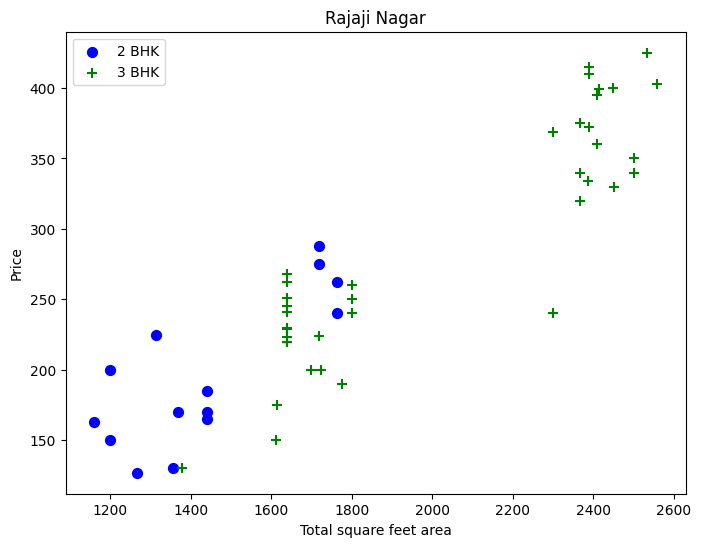

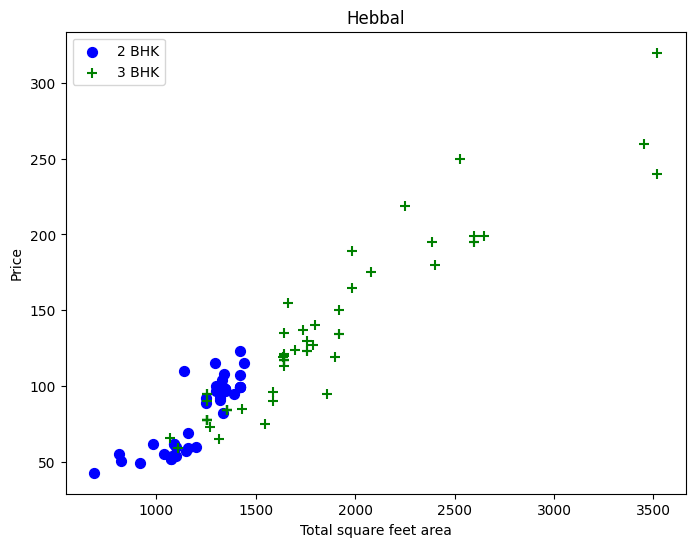

In [44]:
plot_scatter_chart(df7, "Rajaji Nagar")
plot_scatter_chart(df7, "Hebbal")

**We should also remove properties where for same location, the price of (for example) 3bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.**


 **{
  '1' : {
      'mean' : 4000,
      'std' : 2000,
      'count' : 34
  },
  '2' : {
      'mean' : 4300,
      'std' : 2300,
      'count' : 22
  },
}**



**Now, we can remove those 2bhk apartments whose price_per_sqft is less than mean price_per_sqft of 1bhk apartment**

In [45]:
def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby("location"):
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby("bhk"):
      bhk_stats[bhk] = {
          "mean" : np.mean(bhk_df.price_per_sqft),
          "std" : np.std(bhk_df.price_per_sqft),
          "count" : bhk_df.shape[0]
      }

    for bhk, bhk_df in location_df.groupby("bhk"):
      stats = bhk_stats.get(bhk-1)
      if stats and stats["count"]>5:
        exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats["mean"])].index.values)

  return df.drop(exclude_indices, axis="index")

In [46]:
df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 7)

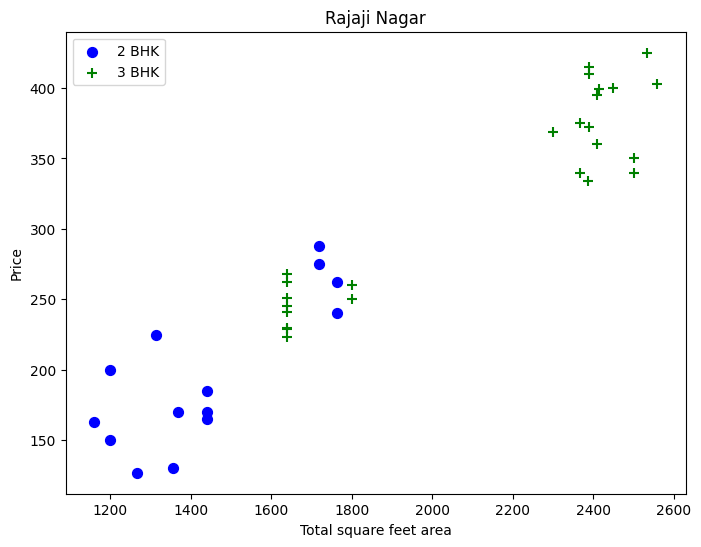

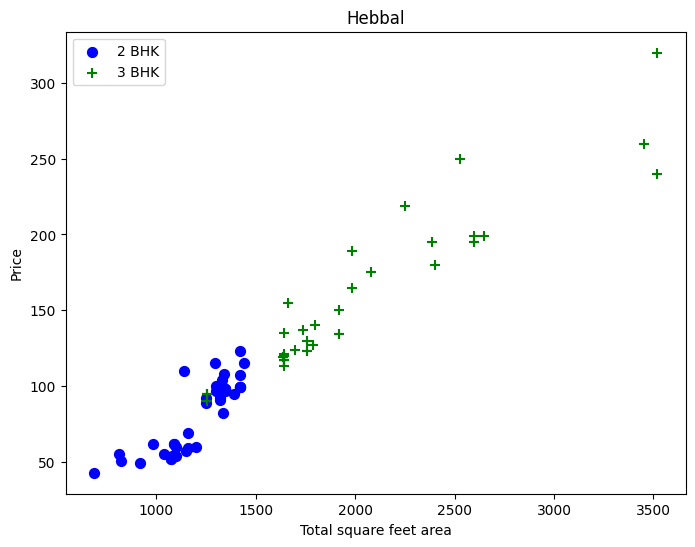

In [47]:
plot_scatter_chart(df8, "Rajaji Nagar")
plot_scatter_chart(df8, "Hebbal")

Text(0, 0.5, 'Count')

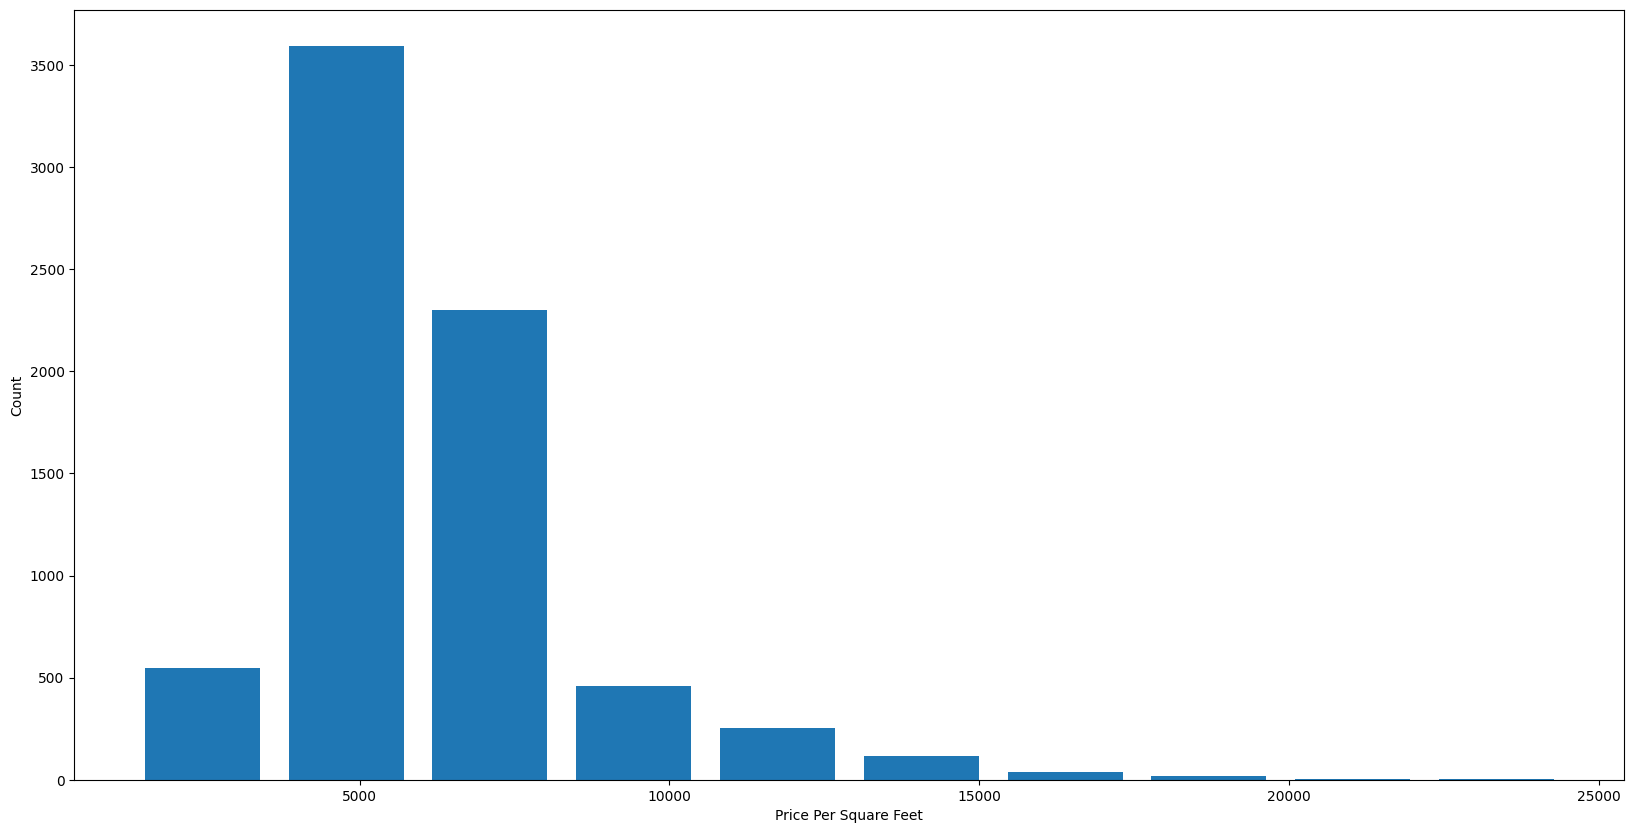

In [48]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [49]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [50]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

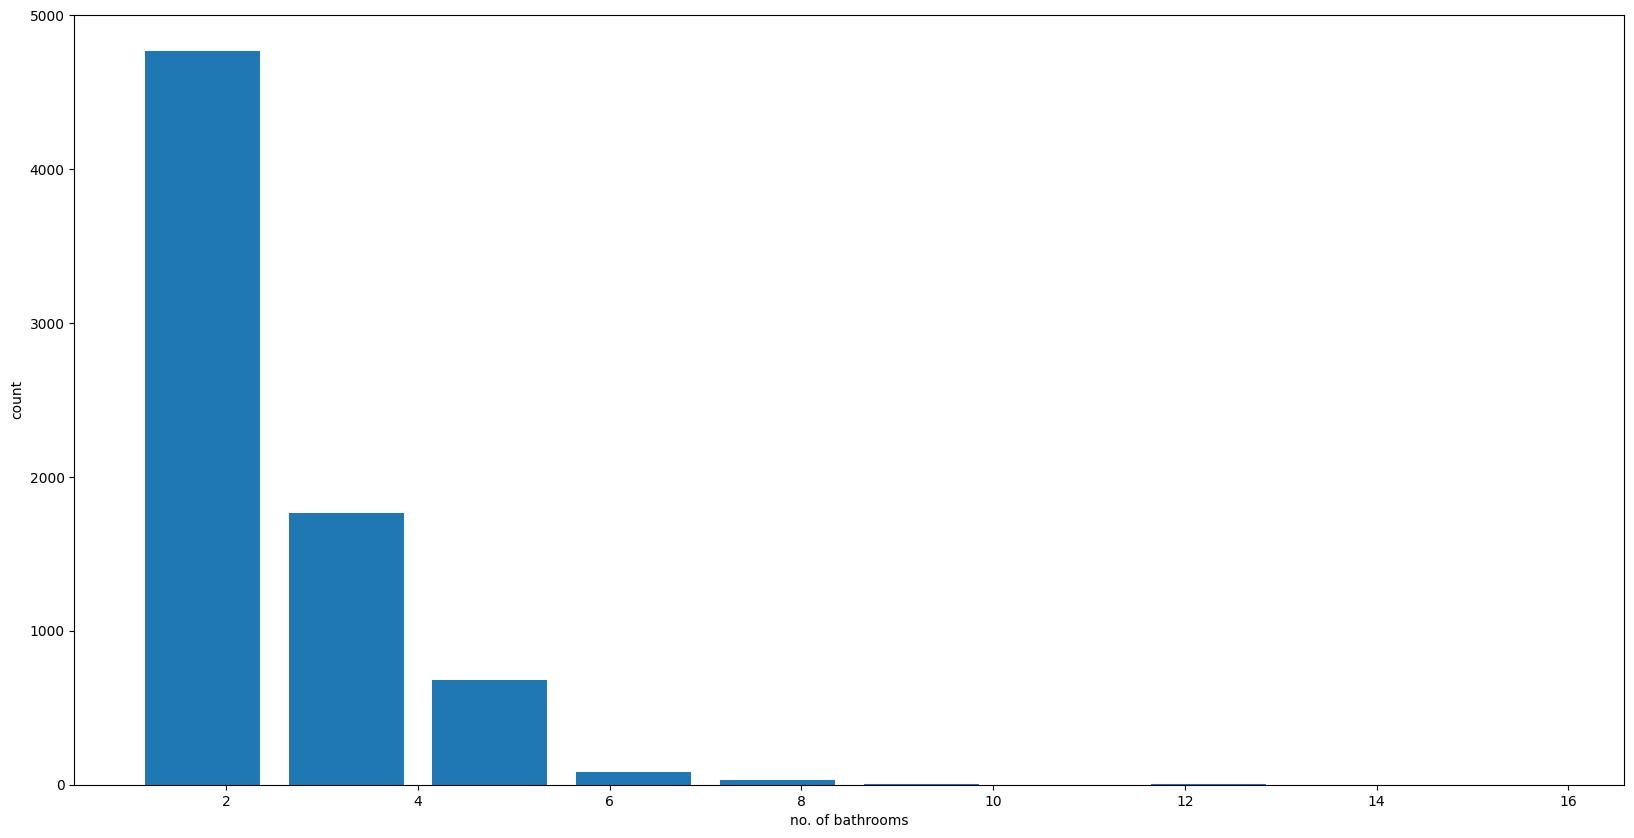

In [51]:
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel("no. of bathrooms")
plt.ylabel("count")

it is quite unusal that a home has 2 more bathrooms than the number of bedrooms. 4 bedroom home and even if it has bathroom in all 4 rooms plus one guest bathroom then it'll have total bathrooms = total bed + 1(for guest) max. Anything above that would be consider as an outlier or a data error and should be removed.

In [52]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [53]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

In [54]:
df9.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

In [55]:
df10 = df9.drop(["price_per_sqft", "size"], axis="columns")
df10.shape

(7251, 5)

In [56]:
df10.head(10)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
5,1st Block Jayanagar,2750.0,4.0,413.0,4
6,1st Block Jayanagar,2450.0,4.0,368.0,4
8,1st Phase JP Nagar,1875.0,3.0,167.0,3
9,1st Phase JP Nagar,1500.0,5.0,85.0,5
10,1st Phase JP Nagar,2065.0,4.0,210.0,3


In [57]:
dummies = pd.get_dummies(df10.location).astype(int)
dummies.head(10)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df11 = pd.concat([df10, dummies.drop("other", axis="columns")], axis="columns")
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df12 = df11.drop("location", axis="columns")
print(df12.shape)
df12.head(5)

(7251, 245)


,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
X = df12.drop("price", axis="columns")
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
y = df12["price"]
y.head()

,price
0,428.0
1,194.0
2,235.0
3,130.0
4,148.0


Train - Test split

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [63]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(5800, 244)
(5800,)
(1451, 244)
(1451,)


ML -- Models

Model : Linear Regression

In [64]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8452277697874329

In [65]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(lr, X, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [66]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [67]:
def find_best_model_by_gridsearchcv(X, y):
  models = {
      "linear_regression" : {
          "model" : LinearRegression(),
          "params" : {"fit_intercept" : [True, False]}
      },
      "lasso" : {
          "model" : Lasso(),
          "params" : {"alpha":[1,2], "selection": ["random", "cyclic"]}
      },
      "decision_tree" : {
          "model" : DecisionTreeRegressor(),
          "params" : {"criterion":["mse", "friedman_mse"], "splitter":["best", "random"]}
      }
  }

  scores = []
  cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  for model_name, model_params in models.items():
    gs = GridSearchCV(model_params["model"], model_params["params"], cv=cv, return_train_score=False)
    gs.fit(X, y)
    scores.append({
        "model" : model_name,
        "best_score": gs.best_score_,
        "best_params": gs.best_params_
    })

  # return scores
  return pd.DataFrame(scores, columns=["model", "best_score", "best_params"])


In [68]:
find_best_model_by_gridsearchcv(X, y)

,model,best_score,best_params
0,linear_regression,0.819001,{'fit_intercept': False}
1,lasso,0.687430,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.711565,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [69]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [70]:
print(np.where(X.columns=="2nd Phase Judicial Layout")[0][0])
print(np.where(X.columns=="Yeshwanthpur")[0][0])

5
243


In [71]:
def predict_price(location, sqft, bath, bhk):
  loc_idx = np.where(X.columns==location)[0][0]

  x = np.zeros(len(X.columns))
  x[0] = sqft
  x[1] = bath
  x[2] = bhk
  if loc_idx >= 0:
    x[loc_idx] = 1

  # print(x)
  return lr.predict([x])[0]

In [72]:
predict_price("1st Phase JP Nagar", 1000, 2, 2)

83.49904677188148

In [73]:
predict_price("1st Phase JP Nagar", 1000, 3, 3)

86.80519395214823

In [74]:
predict_price("Indira Nagar", 1000, 2, 2)

181.27815484006715

In [76]:
import pickle

with open("banglore_home_prices_model.pickle", "wb") as f:
  pickle.dump(lr, f)

In [77]:
import json

cols = {
    "data_columns": [col.lower() for col in X.columns]
}

with open("columns.json", "w") as f:
  f.write(json.dumps(cols))